In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay, auc,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay 

In [2]:
file = './Sepsis_for_model.csv'
df = pd.read_csv(file)
df

,HR,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,PaCO2,...,Potassium,Bilirubin_total,PTT,WBC,Platelets,Age,Gender,SepsisLabel,ShockIndex,qSOFA
0,77.0,36.886808,97.0,26.5,68.0,21.00,-3.000000,22.000000,1.0,48.0,...,4.8,0.9,27.2,17.7,158.0,59.28,1.0,0.0,0.793814,1
1,71.5,36.542059,97.0,83.5,68.0,16.50,-3.000000,22.000000,1.0,48.0,...,4.8,0.9,27.2,17.7,158.0,59.28,1.0,0.0,0.737113,1
2,79.0,36.653835,106.0,87.0,72.0,20.75,-3.000000,22.000000,1.0,48.0,...,4.8,0.9,27.2,17.7,138.0,59.28,1.0,0.0,0.745283,0
3,61.0,36.730339,151.0,95.0,90.0,16.00,-3.000000,23.000000,0.6,25.0,...,3.4,0.9,27.2,13.0,138.0,59.28,1.0,0.0,0.403974,0
4,49.0,36.736256,145.0,92.0,84.0,20.00,-1.000000,23.000000,0.6,25.0,...,3.4,0.9,27.2,13.0,138.0,59.28,1.0,0.0,0.337931,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172405,54.5,37.200000,104.5,74.0,55.0,1.00,1.162219,25.326791,0.5,39.0,...,4.6,0.8,52.9,20.3,181.0,66.00,1.0,1.0,0.521531,0
172406,54.0,37.200000,112.0,74.0,52.0,1.00,1.076861,25.324855,0.5,39.0,...,4.6,0.8,52.9,20.3,181.0,66.00,1.0,1.0,0.482143,0
172407,67.5,37.200000,118.0,77.0,55.0,1.00,1.060464,25.328213,0.5,39.0,...,4.6,0.8,52.9,20.3,181.0,66.00,1.0,1.0,0.572034,0
172408,67.0,37.200000,115.5,76.0,55.5,1.00,1.023737,25.396821,0.5,39.0,...,4.6,0.8,52.9,20.3,181.0,66.00,1.0,1.0,0.580087,0


In [3]:
X=df.drop(columns=['SepsisLabel'])
y=df['SepsisLabel']

In [4]:
y.value_counts()/y.shape[0]

0.0    0.838084
1.0    0.161916
Name: SepsisLabel, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25,
                                                    shuffle=True)

<h3>Feature Scaling</h3><br>
<li><b>MinMax</b> scaler for skewed data
<li><b>Standard</b> scaler for columns following normal distribution

In [6]:
minMax=MinMaxScaler()
normal_cols=['AST', 'BUN','Alkalinephos', 'FiO2','Creatinine','Lactate','Bilirubin_total','PTT', 'Age']

X_train[normal_cols] =minMax.fit_transform(X_train[normal_cols])
X_test[normal_cols] =minMax.transform(X_test[normal_cols])

In [7]:
scaler = StandardScaler()
standard_cols=['HR',  'Temp',  'Resp','BaseExcess', 'HCO3',   'PaCO2',  'Calcium', 'SBP', 'MAP','DBP',
               'Chloride', 'Glucose','Magnesium', 'Phosphate', 'Potassium', 'WBC', 'Platelets']

X_train[standard_cols] = scaler.fit_transform(X_train[standard_cols])
X_test[standard_cols] = scaler.transform(X_test[standard_cols])

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X_train.describe()

,HR,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,PaCO2,...,Phosphate,Potassium,Bilirubin_total,PTT,WBC,Platelets,Age,Gender,ShockIndex,qSOFA
count,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,...,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000,129307.000
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.445,0.000,...,-0.000,-0.000,0.137,0.120,0.000,0.000,0.545,0.589,0.744,0.491
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.171,1.000,...,1.000,1.000,0.071,0.091,1.000,1.000,0.195,0.492,0.230,0.600
min,-3.640,-12.077,-4.150,-3.811,-3.077,-3.027,-9.446,-7.580,0.000,-4.402,...,-2.328,-5.019,0.000,0.000,-1.755,-1.749,0.000,0.000,0.126,0.000
25%,-0.705,-0.627,-0.723,-0.675,-0.705,-0.581,-0.526,-0.538,0.343,-0.582,...,-0.601,-0.569,0.111,0.079,-0.572,-0.706,0.426,0.000,0.576,0.000
50%,-0.065,-0.044,-0.091,-0.122,-0.112,-0.092,-0.049,-0.057,0.429,-0.096,...,-0.151,-0.075,0.120,0.099,-0.145,-0.145,0.578,1.000,0.709,0.000
75%,0.629,0.655,0.664,0.616,0.555,0.561,0.552,0.603,0.479,0.370,...,0.450,0.420,0.140,0.127,0.368,0.459,0.687,1.000,0.875,1.000
max,7.194,5.081,7.151,13.282,17.008,13.119,4.953,5.419,1.000,6.291,...,9.686,12.286,1.000,1.000,30.284,7.706,1.000,1.000,4.273,2.000


In [9]:
y_test.value_counts()/y_test.shape[0]

0.000   0.838
1.000   0.162
Name: SepsisLabel, dtype: float64

In [10]:
def get_weights(cls):
    class_weights = {0: 1,1: 11}

    return [class_weights[cl] for cl in cls]

In [11]:
def plot_ROC_curve(model,skfold):
    target_names=df.SepsisLabel.unique()
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(skfold.split(X, y)):
        model.fit(X.iloc[train], y.iloc[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X.iloc[test],
            y.iloc[test],
            pos_label=1,
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
                                )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
        )      

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
        )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
            )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()

In [12]:
from sklearn.metrics import PrecisionRecallDisplay, auc

def plot_PR_curve(model,skfold):
    target_names=df.SepsisLabel.unique()
    
    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(skfold.split(X, y)):
        model.fit(X.iloc[train], y.iloc[train])
        viz = PrecisionRecallDisplay.from_estimator(
            model,
            X.iloc[test],
            y.iloc[test],
            pos_label=1,
            name=f"PR fold {fold+1}",
            alpha=0.3,
            lw=1,
            ax=ax
        )
        recall,precision =  viz.recall, viz.precision

    lab = 'Overall AUCPR=%.4f' % (auc(recall, precision))
    ax.plot(
        recall,
        precision,
        color="b",
        label=lab,
        lw=2,
        alpha=0.8,
        )      
    ax.legend(loc="lower left")          
    plt.show()


In [13]:
kfold=10
skf = StratifiedKFold(n_splits=kfold, shuffle=True)

<h3>XGBoost

In [14]:
# Average classification report for XGBoost Cross validation
xgb_originalclass = []
xgb_predictedclass = []

def classification_XGboost(y_true, y_pred):
    xgb_originalclass.extend(y_true)
    xgb_predictedclass.extend(y_pred)
    return recall_score(y_true, y_pred) # return recall score

In [15]:
import xgboost as xgb

modelXGB=xgb.XGBClassifier(learning_rate=0.1,
                           max_depth=15,
                           objective='binary:logistic',                           
                           subsample=0.8,
                           reg_lambda=3,
                           alpha=4)

In [16]:
results = cross_validate(estimator=modelXGB,
                          X=X_train,
                          y=y_train,
                          cv=skf,
                          fit_params={'sample_weight':get_weights(y_train)},
                          scoring=make_scorer(classification_XGboost))

Average scores for Cross validated XGboost model

In [17]:
print(classification_report(xgb_originalclass, xgb_predictedclass)) 

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    108370
         1.0       0.79      0.94      0.86     20937

    accuracy                           0.95    129307
   macro avg       0.89      0.95      0.92    129307
weighted avg       0.96      0.95      0.95    129307



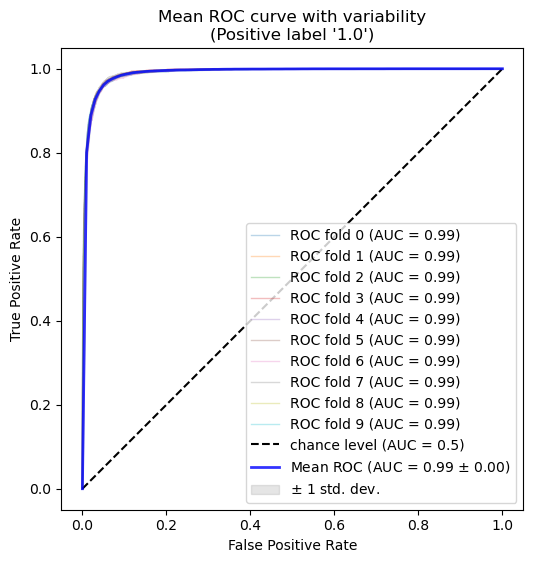

In [18]:
#10 Fold ROC Curve
plot_ROC_curve(modelXGB,skf)

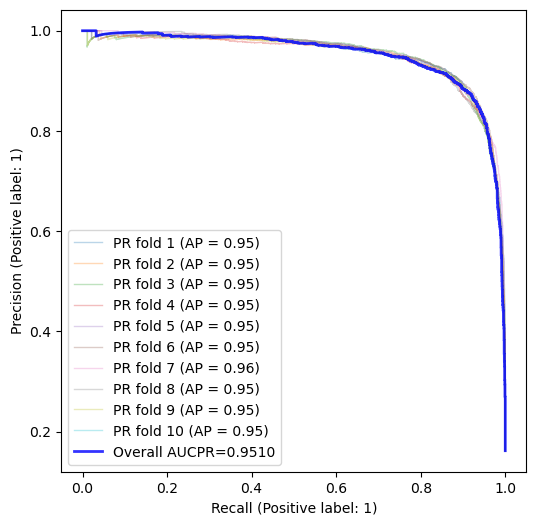

In [22]:
#10 Fold AUCPR Curve
plot_PR_curve(modelXGB,skf)

Testing on Test data

In [23]:
modelXGB.fit(X_train,y_train,sample_weight=get_weights(y_train))

XGBClassifier(alpha=4, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [24]:
y_predict=modelXGB.predict(X_test)

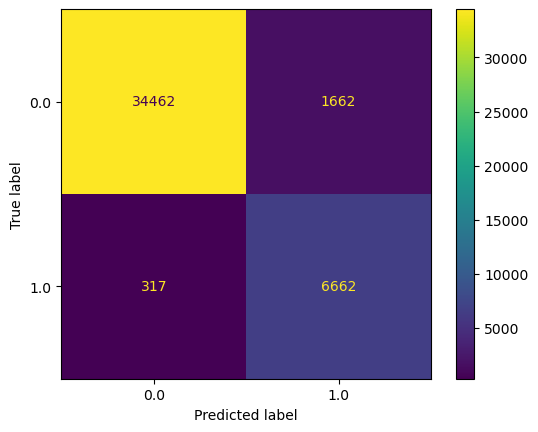

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=modelXGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modelXGB.classes_)
disp.plot()
plt.show()

XGBoost Test Prediction Score

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
print('Recall:', recall_score(y_test,y_predict))
print('Precision:', precision_score(y_test,y_predict))
print('F1 score:', f1_score(y_test, y_predict))
print('Accuracy Score: ',accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     36124
         1.0       0.80      0.95      0.87      6979

    accuracy                           0.95     43103
   macro avg       0.90      0.95      0.92     43103
weighted avg       0.96      0.95      0.96     43103

Recall: 0.9545780197736066
Precision: 0.800336376741951
F1 score: 0.8706789518395087
Accuracy Score:  0.9540867225019141


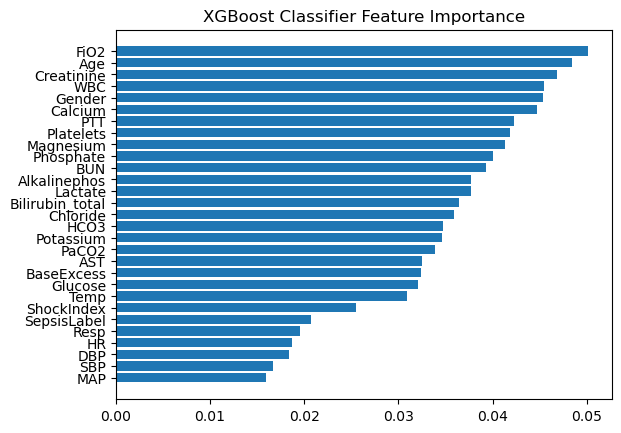

In [27]:
sorted_idx = modelXGB.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx],modelXGB.feature_importances_[sorted_idx])
plt.title('XGBoost Classifier Feature Importance')
plt.show()

<h3>LightBGM 

In [30]:
import lightgbm as lgb
import gc

modelLGB=lgb.LGBMClassifier(boosting_type='gbdt',
                            n_estimators=71,
                            objective='binary',
                            colsample_bytree=0.71,
                            learning_rate=0.1,
                            max_depth=20,                           
                            subsample=0.8,
                            num_leaves=1000,
                            reg_alpha=4,
                            reg_lambda=3)

In [31]:
#Average classification report for LightGBM Cross validation
Lgbm_originalclass = []
Lgbm_predictedclass = []

def Classification_LGBM(y_true, y_pred):
    Lgbm_originalclass.extend(y_true)
    Lgbm_predictedclass.extend(y_pred)
    return recall_score(y_true, y_pred) # return recall score

In [32]:
results = cross_validate(estimator=modelLGB,
                          X=X_train,
                          y=y_train,
                          cv=skf,
                          fit_params={'sample_weight':get_weights(y_train)},
                          scoring=make_scorer(Classification_LGBM))

Average scores for Cross validated XGboost model

In [33]:
print(classification_report(Lgbm_originalclass, Lgbm_predictedclass)) 

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    108370
         1.0       0.73      0.96      0.83     20937

    accuracy                           0.93    129307
   macro avg       0.86      0.94      0.89    129307
weighted avg       0.95      0.93      0.94    129307



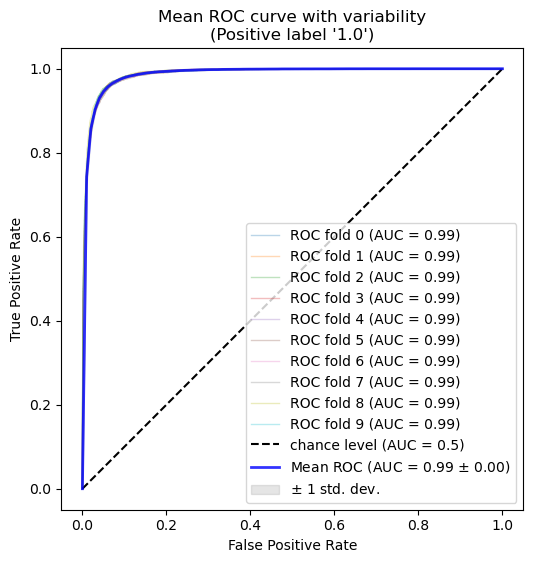

In [34]:
#10 Fold ROC Curve
plot_ROC_curve(modelLGB,skf)

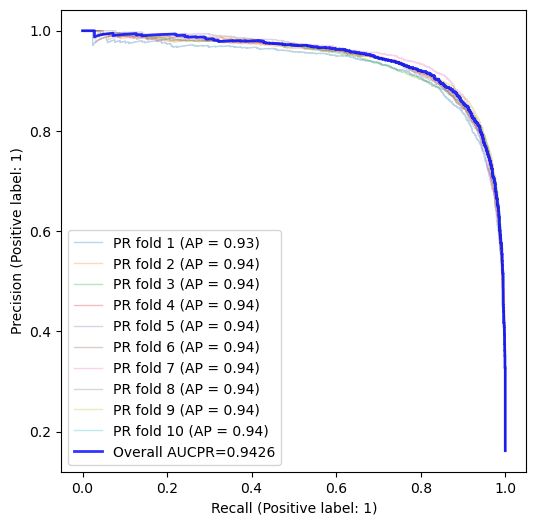

In [35]:
#10 Fold AUCPR Curve
plot_PR_curve(modelLGB,skf)

Testing on Test data

In [36]:
modelLGB.fit(X_train,y_train,sample_weight=get_weights(y_train))

LGBMClassifier(colsample_bytree=0.71, max_depth=20, n_estimators=71,
               num_leaves=1000, objective='binary', reg_alpha=4, reg_lambda=3,
               subsample=0.8)

In [37]:
y_predict_lgbm=modelLGB.predict(X_test)

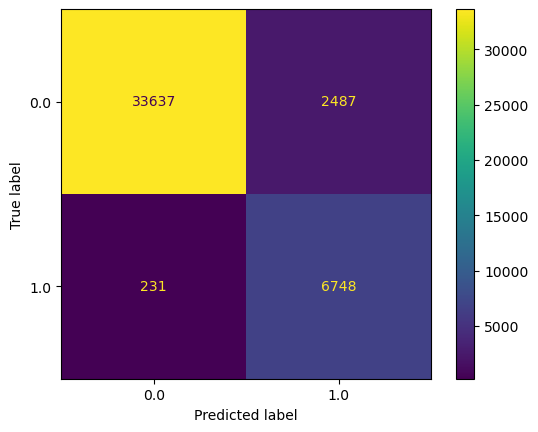

In [38]:
cm_lgbm = confusion_matrix(y_test, y_predict_lgbm, labels=modelLGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm,
                             display_labels=modelLGB.
                              classes_)
disp.plot()
plt.show()

LightGBM Test Prediction Score

In [39]:
print(classification_report(y_test, y_predict_lgbm))
print('Recall:', recall_score(y_test,y_predict_lgbm))
print('Precision:', precision_score(y_test,y_predict_lgbm))
print('F1 score:', f1_score(y_test, y_predict_lgbm))
print('Accuracy Score: ',accuracy_score(y_test,y_predict_lgbm))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     36124
         1.0       0.73      0.97      0.83      6979

    accuracy                           0.94     43103
   macro avg       0.86      0.95      0.90     43103
weighted avg       0.95      0.94      0.94     43103

Recall: 0.966900702106319
Precision: 0.7306984298863021
F1 score: 0.8323670901689896
Accuracy Score:  0.9369417441941397


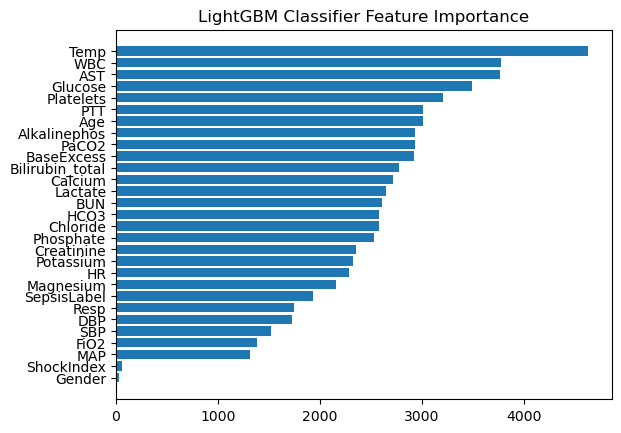

In [40]:
sorted_idx = modelLGB.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx],modelLGB.feature_importances_[sorted_idx])
plt.title('LightGBM Classifier Feature Importance')
plt.show()